In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"data/complete_raw.csv", index_col=0)

In [3]:
df.head()

,Organization,Capital Program,Program Subclass,Project Status,Project Title,Project Planning From,Project Planning To,Planned Construction From,Planned Construction To,Construction Completion From,...,start,end,duration,prior,prior_requests,during_requests,prior_collisions,during_collisions,prior_traffic,during_traffic
0,Transportation Services,Active Transportation,Sidewalk Rehabilitation,Project Complete,Stephen St Sidewalk Rehabilitation,2019-01-01,2019-12-31,2019-01-01,2019-12-31,2019-01-01,...,2019-01-01,2019-12-31,364 days 00:00:00.000000000,2018-01-01,0,1230,612,0,5185.737705,5951.972222
1,City Engineering,Road Rehabilitation,Local Repair / Preventative Maintenance,Project Complete,Mowat Ave Road Repair,2019-01-01,2019-12-31,2019-01-01,2019-12-31,2019-01-01,...,2019-01-01,2019-12-31,364 days 00:00:00.000000000,2018-01-01,0,577,340,0,7113.609756,8996.000000
2,Utilities Kingston,Utilities Construction,Electrical,Project Complete,Electric - Pole Line Design - Bagot Street,2016-01-01,2016-12-31,2017-01-01,2017-12-31,NaN,...,2017-01-01,2017-12-31,364 days 00:00:00.000000000,2016-01-01,0,0,461,422,5992.635294,6012.847561
3,Utilities Kingston,Utilities Construction,Electrical,Project Complete,Electric - 5kV 204 Circuit Line Extension,NaN,NaN,2015-01-01,2015-12-31,2015-01-01,...,2015-01-01,2015-12-31,364 days 00:00:00.000000000,2014-01-01,0,0,0,0,6430.750000,7986.677083
4,Utilities Kingston,Utilties Rehabilitation,Water,Project Complete,2018 Watermain Relining Project,2017-01-01,2017-12-31,2018-01-01,2018-12-31,NaN,...,2018-01-01,2018-12-31,364 days 00:00:00.000000000,2017-01-01,0,0,289,310,10790.975610,8705.764706


In [4]:
'''
TODO main: define label - disruptive {0, 1}
    TODO: Mulitply service requests by 4 for all records that have a prior year is in 2019. (since it starts oct 2019)
    TODO: Only use collisions during the years 2016-2018. Constructions in 2016 do not have prior info on collisions.
    TODO: Find a way to combine the last six columns into one score
    TODO: Find percent change of [collisions, requests, traffic] for those that have a value.
'''

'\nTODO main: define label - disruptive {0, 1}\n    TODO: Mulitply service requests by 4 for all records that have a prior year is in 2019. (since it starts oct 2019)\n    TODO: Only use collisions during the years 2016-2018. Constructions in 2016 do not have prior info on collisions.\n    TODO: Find a way to combine the last six columns into one score\n    TODO: Find percent change of [collisions, requests, traffic] for those that have a value.\n'

In [5]:
df['start_year'] = df['start'].str.split('-').str[0]

In [6]:
metric_cols = ['prior_collisions', 'prior_collisions+', 'during_collisions', 'prior_requests', 'during_requests', 'prior_traffic', 'during_traffic']

In [7]:
df['prior_collisions4'] = df.apply(lambda row: row['prior_collisions'] * 4 if row['start_year'] == '2019' else row['prior_collisions'], axis=1)
df.head()

,Organization,Capital Program,Program Subclass,Project Status,Project Title,Project Planning From,Project Planning To,Planned Construction From,Planned Construction To,Construction Completion From,...,duration,prior,prior_requests,during_requests,prior_collisions,during_collisions,prior_traffic,during_traffic,start_year,prior_collisions4
0,Transportation Services,Active Transportation,Sidewalk Rehabilitation,Project Complete,Stephen St Sidewalk Rehabilitation,2019-01-01,2019-12-31,2019-01-01,2019-12-31,2019-01-01,...,364 days 00:00:00.000000000,2018-01-01,0,1230,612,0,5185.737705,5951.972222,2019,2448
1,City Engineering,Road Rehabilitation,Local Repair / Preventative Maintenance,Project Complete,Mowat Ave Road Repair,2019-01-01,2019-12-31,2019-01-01,2019-12-31,2019-01-01,...,364 days 00:00:00.000000000,2018-01-01,0,577,340,0,7113.609756,8996.000000,2019,1360
2,Utilities Kingston,Utilities Construction,Electrical,Project Complete,Electric - Pole Line Design - Bagot Street,2016-01-01,2016-12-31,2017-01-01,2017-12-31,NaN,...,364 days 00:00:00.000000000,2016-01-01,0,0,461,422,5992.635294,6012.847561,2017,461
3,Utilities Kingston,Utilities Construction,Electrical,Project Complete,Electric - 5kV 204 Circuit Line Extension,NaN,NaN,2015-01-01,2015-12-31,2015-01-01,...,364 days 00:00:00.000000000,2014-01-01,0,0,0,0,6430.750000,7986.677083,2015,0
4,Utilities Kingston,Utilties Rehabilitation,Water,Project Complete,2018 Watermain Relining Project,2017-01-01,2017-12-31,2018-01-01,2018-12-31,NaN,...,364 days 00:00:00.000000000,2017-01-01,0,0,289,310,10790.975610,8705.764706,2018,289


In [8]:
df['during_traffic'] = df['during_traffic'].replace(0, np.nan)
df['during_collisions'] = df['during_collisions'].replace(0, np.nan)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df['requests_change'] = (df['during_requests'] - df['prior_requests']) / df['prior_requests']
df['collisions_change'] = (df['during_collisions'] - df['prior_collisions4']) / df['prior_collisions4']
df['traffic_change'] = (df['during_traffic'] - df['prior_traffic']) / df['prior_traffic']

In [11]:
metric_cols = ['prior_collisions', 'prior_collisions4', 'during_collisions', 'collisions_change', 'prior_requests', 
                'during_requests', 'requests_change', 'prior_traffic', 'during_traffic', 'traffic_change']
df[metric_cols]

,prior_collisions,prior_collisions4,during_collisions,collisions_change,prior_requests,during_requests,requests_change,prior_traffic,during_traffic,traffic_change
0,612,2448,NaN,NaN,0,1230,inf,5185.737705,5951.972222,0.147758
1,340,1360,NaN,NaN,0,577,inf,7113.609756,8996.000000,0.264618
2,461,461,422.0,-0.084599,0,0,NaN,5992.635294,6012.847561,0.003373
3,0,0,NaN,NaN,0,0,NaN,6430.750000,7986.677083,0.241951
4,289,289,310.0,0.072664,0,0,NaN,10790.975610,8705.764706,-0.193237
...,...,...,...,...,...,...,...,...,...,...
142,0,0,NaN,NaN,338,1295,2.831361,14411.923077,9934.363636,-0.310684
143,0,0,NaN,NaN,1295,1699,0.311969,9934.363636,343.333333,-0.965440
144,0,0,NaN,NaN,338,1295,2.831361,14411.923077,9934.363636,-0.310684
145,0,0,NaN,NaN,1295,1699,0.311969,9934.363636,343.333333,-0.965440


In [12]:
df = df.replace(np.inf, np.nan)
df[metric_cols]

,prior_collisions,prior_collisions4,during_collisions,collisions_change,prior_requests,during_requests,requests_change,prior_traffic,during_traffic,traffic_change
0,612,2448,NaN,NaN,0,1230,NaN,5185.737705,5951.972222,0.147758
1,340,1360,NaN,NaN,0,577,NaN,7113.609756,8996.000000,0.264618
2,461,461,422.0,-0.084599,0,0,NaN,5992.635294,6012.847561,0.003373
3,0,0,NaN,NaN,0,0,NaN,6430.750000,7986.677083,0.241951
4,289,289,310.0,0.072664,0,0,NaN,10790.975610,8705.764706,-0.193237
...,...,...,...,...,...,...,...,...,...,...
142,0,0,NaN,NaN,338,1295,2.831361,14411.923077,9934.363636,-0.310684
143,0,0,NaN,NaN,1295,1699,0.311969,9934.363636,343.333333,-0.965440
144,0,0,NaN,NaN,338,1295,2.831361,14411.923077,9934.363636,-0.310684
145,0,0,NaN,NaN,1295,1699,0.311969,9934.363636,343.333333,-0.965440


In [13]:
cols = ['collisions_change', 'requests_change', 'traffic_change']
df[cols].describe()

,collisions_change,requests_change,traffic_change
count,85.000000,107.000000,305.000000
mean,0.022949,1.886915,0.343059
std,0.120078,1.282766,3.350919
min,-0.276923,-0.876240,-0.965440
25%,-0.071298,0.481380,-0.226698
50%,0.012195,2.509465,0.010192
75%,0.177515,2.831361,0.243760
max,0.177515,4.800000,35.180124


In [14]:
import matplotlib.pyplot as plt

C:\Users\vedan\AppData\Roaming\Python\Python38\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\vedan\AppData\Roaming\Python\Python38\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 0, 'Percent Change')

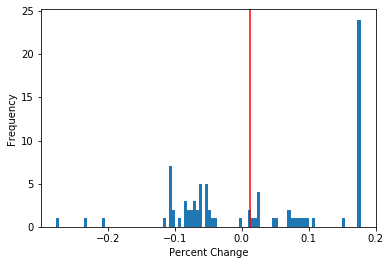

In [15]:
plt.hist(df['collisions_change'], bins = 100)
plt.axvline(df['collisions_change'].quantile(0.5), color='red')
plt.ylabel('Frequency')
plt.xlabel('Percent Change')

Text(0.5, 0, 'Percent Change')

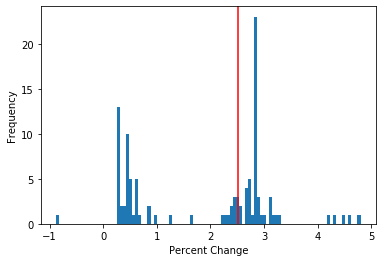

In [16]:
plt.hist(df['requests_change'], bins = 100)
plt.axvline(df['requests_change'].quantile(0.5), color='red')
plt.ylabel('Frequency')
plt.xlabel('Percent Change')

(-5, 5)

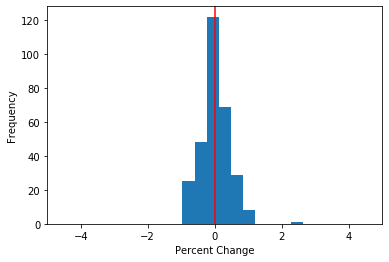

In [17]:
plt.hist(df['traffic_change'], bins = 100)
plt.axvline(df['traffic_change'].quantile(0.5), color='red')
plt.ylabel('Frequency')
plt.xlabel('Percent Change')
plt.xlim(-5, 5)

In [18]:
df['traffic_change'].std()

3.350918839894176

In [19]:
df[['collisions_change', 'requests_change', 'traffic_change']].isna().sum()

collisions_change    229
requests_change      207
traffic_change         9
dtype: int64

In [20]:
df.head()

,Organization,Capital Program,Program Subclass,Project Status,Project Title,Project Planning From,Project Planning To,Planned Construction From,Planned Construction To,Construction Completion From,...,during_requests,prior_collisions,during_collisions,prior_traffic,during_traffic,start_year,prior_collisions4,requests_change,collisions_change,traffic_change
0,Transportation Services,Active Transportation,Sidewalk Rehabilitation,Project Complete,Stephen St Sidewalk Rehabilitation,2019-01-01,2019-12-31,2019-01-01,2019-12-31,2019-01-01,...,1230,612,NaN,5185.737705,5951.972222,2019,2448,NaN,NaN,0.147758
1,City Engineering,Road Rehabilitation,Local Repair / Preventative Maintenance,Project Complete,Mowat Ave Road Repair,2019-01-01,2019-12-31,2019-01-01,2019-12-31,2019-01-01,...,577,340,NaN,7113.609756,8996.000000,2019,1360,NaN,NaN,0.264618
2,Utilities Kingston,Utilities Construction,Electrical,Project Complete,Electric - Pole Line Design - Bagot Street,2016-01-01,2016-12-31,2017-01-01,2017-12-31,NaN,...,0,461,422.0,5992.635294,6012.847561,2017,461,NaN,-0.084599,0.003373
3,Utilities Kingston,Utilities Construction,Electrical,Project Complete,Electric - 5kV 204 Circuit Line Extension,NaN,NaN,2015-01-01,2015-12-31,2015-01-01,...,0,0,NaN,6430.750000,7986.677083,2015,0,NaN,NaN,0.241951
4,Utilities Kingston,Utilties Rehabilitation,Water,Project Complete,2018 Watermain Relining Project,2017-01-01,2017-12-31,2018-01-01,2018-12-31,NaN,...,0,289,310.0,10790.975610,8705.764706,2018,289,NaN,0.072664,-0.193237


In [21]:
df['requests_bin'] = df['requests_change'].map(lambda val: 1 if (val > df['requests_change'].quantile(0.5)) else 0)
df['collisions_bin'] = df['collisions_change'].map(lambda val: 1 if (val > df['collisions_change'].quantile(0.5)) else 0)
df['traffic_bin'] = df['traffic_change'].map(lambda val: 1 if (val < df['traffic_change'].quantile(0.5)) else 0)

In [22]:
import math

evidence = []

for i in range(len(df)):
    req = df.iloc[i,31]
    col = df.iloc[i,32]
    tra = df.iloc[i,33]
    reqbin = df.iloc[i,34]
    colbin = df.iloc[i,35]
    trabin = df.iloc[i,36]
    
    if(math.isnan(req) == True and math.isnan(col) == True and math.isnan(tra) == False):
        evidence.append(trabin)
    
    if(math.isnan(req) == False and math.isnan(col) == True and math.isnan(tra) == False):
        if reqbin == trabin:
            evidence.append(trabin)
        else:
            evidence.append(0)

    if(math.isnan(req) == True and math.isnan(col) == False and math.isnan(tra) == False):
        if colbin == trabin:
            evidence.append(trabin)
        else:
            evidence.append(0)

    if(math.isnan(req) == True and math.isnan(col) == False and math.isnan(tra) == True):
        evidence.append(colbin)

    if(math.isnan(req) == False and math.isnan(col) == True and math.isnan(tra) == True):
        evidence.append(reqbin)

    if(math.isnan(req) == True and math.isnan(col) == True and math.isnan(tra) == True):
        evidence.append(np.nan)
        
df['evidence'] = evidence

In [23]:
'''
TODO: where collisions_change > thresh mark as 1 else 0
TODO: where requests_change > thresh mark as 1 else 0
TODO: where traffic_change < thresh mark as 1 else 0
'''

'\nTODO: where collisions_change > thresh mark as 1 else 0\nTODO: where requests_change > thresh mark as 1 else 0\nTODO: where traffic_change < thresh mark as 1 else 0\n'

In [24]:
df.head()

,Organization,Capital Program,Program Subclass,Project Status,Project Title,Project Planning From,Project Planning To,Planned Construction From,Planned Construction To,Construction Completion From,...,during_traffic,start_year,prior_collisions4,requests_change,collisions_change,traffic_change,requests_bin,collisions_bin,traffic_bin,evidence
0,Transportation Services,Active Transportation,Sidewalk Rehabilitation,Project Complete,Stephen St Sidewalk Rehabilitation,2019-01-01,2019-12-31,2019-01-01,2019-12-31,2019-01-01,...,5951.972222,2019,2448,NaN,NaN,0.147758,0,0,0,0.0
1,City Engineering,Road Rehabilitation,Local Repair / Preventative Maintenance,Project Complete,Mowat Ave Road Repair,2019-01-01,2019-12-31,2019-01-01,2019-12-31,2019-01-01,...,8996.000000,2019,1360,NaN,NaN,0.264618,0,0,0,0.0
2,Utilities Kingston,Utilities Construction,Electrical,Project Complete,Electric - Pole Line Design - Bagot Street,2016-01-01,2016-12-31,2017-01-01,2017-12-31,NaN,...,6012.847561,2017,461,NaN,-0.084599,0.003373,0,0,1,0.0
3,Utilities Kingston,Utilities Construction,Electrical,Project Complete,Electric - 5kV 204 Circuit Line Extension,NaN,NaN,2015-01-01,2015-12-31,2015-01-01,...,7986.677083,2015,0,NaN,NaN,0.241951,0,0,0,0.0
4,Utilities Kingston,Utilties Rehabilitation,Water,Project Complete,2018 Watermain Relining Project,2017-01-01,2017-12-31,2018-01-01,2018-12-31,NaN,...,8705.764706,2018,289,NaN,0.072664,-0.193237,0,1,1,1.0


In [25]:
df['evidence'].value_counts()

0.0    218
1.0     95
Name: evidence, dtype: int64

In [26]:
df.columns

Index(['Organization', 'Capital Program', 'Program Subclass', 'Project Status',
       'Project Title', 'Project Planning From', 'Project Planning To',
       'Planned Construction From', 'Planned Construction To',
       'Construction Completion From', 'Construction Completion To',
       'Project Description', 'Project URL', 'SDE ID', 'GeoJSON',
       'geo_point_2d', 'lat', 'lon', 'rect', 'start', 'end', 'duration',
       'prior', 'prior_requests', 'during_requests', 'prior_collisions',
       'during_collisions', 'prior_traffic', 'during_traffic', 'start_year',
       'prior_collisions4', 'requests_change', 'collisions_change',
       'traffic_change', 'requests_bin', 'collisions_bin', 'traffic_bin',
       'evidence'],
      dtype='object')

In [27]:
df = df.drop(['Project Status', 'Construction Completion From','Construction Completion To','during_collisions',
              'during_traffic','during_requests', 'requests_change', 'collisions_change',
              'traffic_change', 'requests_bin', 'collisions_bin', 'traffic_bin'], axis=1)
df.to_csv('data/ML_ready.csv', index=False)